In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
import datetime as dt
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [3]:
#Set Duration
start = dt.datetime(2018, 6, 7)
end = dt.datetime.now()

In [4]:
crypto_currency='ETH'
against_currency='USD'

In [5]:
#Import dataset using DataReader
df = data.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-05,611.643005,596.395996,610.262024,607.124023,1.756530e+09,607.124023
2018-06-06,616.143982,601.692993,607.687012,605.187012,1.880140e+09,605.187012
2018-06-07,608.810974,595.593018,605.442993,601.077026,1.637780e+09,601.077026
2018-06-08,608.583008,597.562012,600.905029,597.562012,1.519310e+09,597.562012
2018-06-09,594.344971,511.889008,594.344971,526.479004,2.234880e+09,526.479004


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-02,2891.254883,2667.684326,2708.376221,2855.126465,3.003821e+10,2855.126465
2021-06-03,2857.165527,2562.637451,2857.165527,2688.195068,3.417384e+10,2688.195068
2021-06-04,2817.484863,2558.233643,2691.619385,2630.576904,3.049667e+10,2630.576904
2021-06-05,2743.441162,2616.162354,2629.748779,2715.092773,2.531164e+10,2715.092773
2021-06-07,2797.823242,2702.238770,2721.686768,2790.641602,2.650295e+10,2790.641602


In [7]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1094.000000,1094.000000,1094.000000,1094.000000,1.094000e+03,1094.000000
mean,530.293856,488.244735,510.299364,512.201684,1.250469e+10,512.201684
std,734.089007,658.364057,698.412001,701.655092,1.199934e+10,701.655092
min,85.342743,82.829887,84.279694,84.308296,1.084810e+09,84.308296
25%,175.620590,167.045307,171.637955,171.690735,4.477528e+09,171.690735
50%,233.353790,222.989120,228.762665,228.654282,8.804010e+09,228.654282
75%,441.783401,419.680786,431.868240,432.097504,1.588877e+10,432.097504
max,4362.350586,3785.848633,4174.635742,4168.701172,8.448291e+10,4168.701172


In [8]:
len(df)

1094

In [9]:
#Exploratory Data Analysis
#Maximum Closing Price
df.xs(key='Close',axis=1).max()

4168.701171875

In [10]:
#Visualization (Closing Price)
df.xs(key='Close',axis=1).iplot()

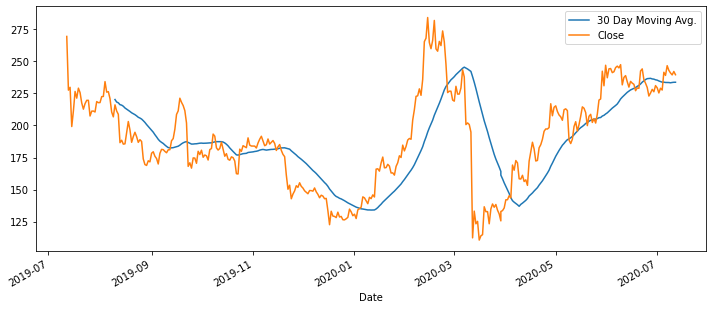

In [11]:
# 30 day moving Average for Close Price
plt.figure(figsize=(12,5))
df['Close'].loc['2019-07-12':'2020-07-12'].rolling(window=30).mean().plot(label='30 Day Moving Avg.')
df['Close'].loc['2019-07-12':'2020-07-12'].plot(label='Close')
plt.legend()

In [12]:
#Candle stick Graph
df0 = df[['Open','High','Low','Close']].loc['2019-07-12':'2020-07-12']
df0.iplot(kind='candle')

In [13]:
#Visualization of Simple Moving Average
df['Close'].loc['2019-07-10':'2020-07-10'].ta_plot(study='sma',periods=[9,18,27])

In [14]:
#Resetting the index to Closing Price
df1=df.reset_index()['Close']

In [15]:
df1

0        607.124023
1        605.187012
2        601.077026
3        597.562012
4        526.479004
           ...     
1089    2855.126465
1090    2688.195068
1091    2630.576904
1092    2715.092773
1093    2790.641602
Name: Close, Length: 1094, dtype: float64

In [16]:
#Scaling the data using Minmax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1

array([[0.12800329],
       [0.12752904],
       [0.12652278],
       ...,
       [0.62341422],
       [0.64410662],
       [0.66260357]])

In [18]:
#Splitting train and test sets as 70% train and 30% test sets
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size

765

In [20]:
test_size

329

In [21]:
train_data

array([[1.28003290e-01],
       [1.27529043e-01],
       [1.26522777e-01],
       [1.25662181e-01],
       [1.08258613e-01],
       [1.09924710e-01],
       [1.01002696e-01],
       [9.62653946e-02],
       [1.06609164e-01],
       [9.95731101e-02],
       [1.01687990e-01],
       [1.01885327e-01],
       [1.06400806e-01],
       [1.11068814e-01],
       [1.10655298e-01],
       [1.08476026e-01],
       [9.34064625e-02],
       [9.55372572e-02],
       [9.14122887e-02],
       [9.20581621e-02],
       [8.53159129e-02],
       [8.76646064e-02],
       [8.27679179e-02],
       [8.61084419e-02],
       [9.08021603e-02],
       [9.04931808e-02],
       [9.57397343e-02],
       [9.30093462e-02],
       [9.37739607e-02],
       [9.55108147e-02],
       [9.54128824e-02],
       [9.97337229e-02],
       [9.91115948e-02],
       [9.60665936e-02],
       [8.57203814e-02],
       [8.86814075e-02],
       [8.46553501e-02],
       [8.56231813e-02],
       [8.61272931e-02],
       [8.94971960e-02],


In [22]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [24]:
X_train

array([[0.12800329, 0.12752904, 0.12652278, ..., 0.02466895, 0.02424417,
        0.03110516],
       [0.12752904, 0.12652278, 0.12566218, ..., 0.02424417, 0.03110516,
        0.03120187],
       [0.12652278, 0.12566218, 0.10825861, ..., 0.03110516, 0.03120187,
        0.03397462],
       ...,
       [0.01142843, 0.01010565, 0.01189803, ..., 0.03544366, 0.03509856,
        0.03848844],
       [0.01010565, 0.01189803, 0.01206673, ..., 0.03509856, 0.03848844,
        0.03789235],
       [0.01189803, 0.01206673, 0.01256643, ..., 0.03848844, 0.03789235,
        0.03975174]])

In [25]:
print(X_train.shape), print(y_train.shape)

(664, 100)
(664,)


(None, None)

In [26]:
print(X_test.shape), print(y_test.shape)

(228, 100)
(228,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
X_train.shape

(664, 100, 1)

In [29]:
X_test.shape

(228, 100, 1)

In [30]:
#Importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
#Stacked LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Fitting the model by giving the data 100 times to the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 10s 323ms/step - loss: 2.4019e-04 - val_loss: 0.1272
Epoch 2/100
11/11 [==============================] - 2s 153ms/step - loss: 1.1847e-04 - val_loss: 0.1079
Epoch 3/100
11/11 [==============================] - 2s 152ms/step - loss: 9.4674e-05 - val_loss: 0.0613
Epoch 4/100
11/11 [==============================] - 2s 146ms/step - loss: 7.3882e-05 - val_loss: 0.0170
Epoch 5/100
11/11 [==============================] - 2s 155ms/step - loss: 5.6979e-05 - val_loss: 0.0145
Epoch 6/100
11/11 [==============================] - 2s 155ms/step - loss: 4.8460e-05 - val_loss: 0.0173
Epoch 7/100
11/11 [==============================] - 2s 152ms/step - loss: 4.0143e-05 - val_loss: 0.0104
Epoch 8/100
11/11 [==============================] - 2s 140ms/step - loss: 3.6094e-05 - val_loss: 0.0104
Epoch 9/100
11/11 [==============================] - 2s 142ms/step - loss: 3.2251e-05 - val_loss: 0.0095
Epoch 10/100
11/11 [==============================] - 